In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv('../data/train_xy.csv')

In [3]:
test = pd.read_csv('../data/test_all.csv')

In [4]:
train.head()

cust_id cust_group  y       x_1       x_2  x_3  x_4  x_5  x_6  x_7  ...    \
0   110000    group_3  0  0.354167  0.604988  -99  -99  -99  -99  -99  ...     
1   110001    group_3  0  0.125000  0.012058  -99  -99  -99  -99  -99  ...     
2   110002    group_3  0  0.333333  0.565979    0    0    0    0    0  ...     
3   110003    group_3  0  0.208333  0.316209    0    0    0    0    1  ...     
4   110004    group_3  0  0.208333  0.008061  -99  -99  -99  -99  -99  ...     

   x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0      1      1      1      1      1      1      1      1      3    -99  
1      1      1      1      1      1      1      1      1      2      2  
2      1      1      2      1      1      1      1      1      2      2  
3      2      1      1      1      1      1      1      1      2      4  
4      1      1      1      1      1      1      1      1      2      1  

[5 rows x 160 columns]

In [5]:
train.shape

(15000, 160)

In [6]:
test.head()

cust_id cust_group       x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  \
0        1    group_1  0.291667  0.555388  -99  -99  -99  -99  -99  -99   
1        2    group_3  0.270833  0.770302    0    0    0    0    1    1   
2        3    group_3  0.354167  0.440327    0    0    0    0    4    3   
3        4    group_1  0.208333  0.476509    0    0    0    0    1    1   
4        5    group_1  0.125000  0.955286    0    0    0    0    2    1   

   ...    x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0  ...        1      1      1      1      1      1      2      2      2      3  
1  ...        1      1      1      1      1      1      2      2      1     10  
2  ...        1      1      1      1      1      1      1      1      3      3  
3  ...        1      1      1      1      1      1      1      1      1      4  
4  ...        1      1      1      1      1      1      1      1      1     10  

[5 rows x 159 columns]

In [7]:
x_train = train.drop(['cust_group','y','cust_id'],axis =1)

In [8]:
x_test = test.drop(['cust_group','cust_id'],axis=1)

In [9]:
x_train.shape

(15000, 157)

In [10]:
x_test.shape

(10000, 157)

In [11]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

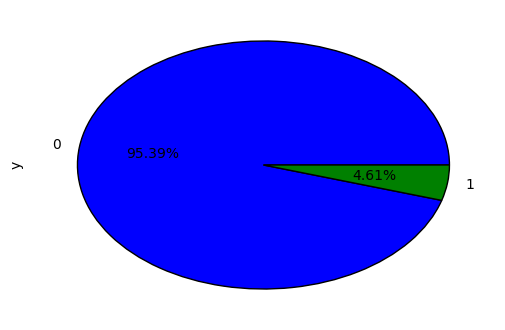

In [12]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [13]:
y_train = train['y']

In [14]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
    x = pd.concat([x, dummies_df], axis=1)

In [15]:
x.head()

x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10   ...     \
0  0.354167  0.604988  -99  -99  -99  -99  -99  -99  -99   -99   ...      
1  0.125000  0.012058  -99  -99  -99  -99  -99  -99  -99   -99   ...      
2  0.333333  0.565979    0    0    0    0    0    0    0     0   ...      
3  0.208333  0.316209    0    0    0    0    1    1    0     0   ...      
4  0.208333  0.008061  -99  -99  -99  -99  -99  -99    0     1   ...      

   x_1561  x_1562  x_1563  x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  \
0       0       0       1         1       0       0       0       0        0   
1       0       1       0         0       0       1       0       0        0   
2       0       1       0         0       0       1       0       0        0   
3       0       1       0         0       0       0       0       1        0   
4       0       1       0         0       1       0       0       0        0   

   x_15711  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 355 columns]

In [16]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 355)
(10000, 355)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from sklearn.cross_validation import train_test_split
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical

In [18]:
X_train,X_val,y_train,y_val= train_test_split(train_X,y_train,test_size=0.2,random_state=2)

In [19]:
X_train = X_train.values
X_val = X_val.values

In [21]:
y_train =  y_train.values
yy_train = to_categorical(y_train)

y_val =  y_val.values
yy_val = to_categorical(y_val)

In [83]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(BatchNormalization(input_shape=(355,)))
model.add(Reshape((355,1,1)))


model.add(Conv2D(filters = 16, kernel_size = 5,padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = 5,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
# model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = 3,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [73]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [74]:
history=model.fit(X_train,yy_train, batch_size=256, epochs=15, verbose=1, validation_split=0.1)

Train on 10800 samples, validate on 1200 samples
Epoch 1/15
10800/10800 [==============================] - 9s 834us/step - loss: 0.2712 - acc: 0.9313 - val_loss: 0.4231 - val_acc: 0.9583
Epoch 2/15
10800/10800 [==============================] - 7s 656us/step - loss: 0.1911 - acc: 0.9530 - val_loss: 0.3756 - val_acc: 0.9583
Epoch 3/15
10800/10800 [==============================] - 7s 657us/step - loss: 0.1761 - acc: 0.9530 - val_loss: 0.3149 - val_acc: 0.9583
Epoch 4/15
10800/10800 [==============================] - 7s 660us/step - loss: 0.1687 - acc: 0.9530 - val_loss: 0.2079 - val_acc: 0.9583
Epoch 5/15
10800/10800 [==============================] - 7s 660us/step - loss: 0.1662 - acc: 0.9530 - val_loss: 0.2276 - val_acc: 0.9583
Epoch 6/15
10800/10800 [==============================] - 7s 660us/step - loss: 0.1626 - acc: 0.9530 - val_loss: 0.1857 - val_acc: 0.9583
Epoch 7/15
10800/10800 [==============================] - 7s 661us/step - loss: 0.1607 - acc: 0.9530 - val_loss: 0.1534 - v

In [75]:
predictions = model.predict_proba(X_val,verbose=1)

3000/3000 [==============================] - 1s 445us/step


In [76]:
pre = predictions[:,1]
val_auc = metrics.roc_auc_score(y_val,pre)#验证集上的auc值
print(val_auc)

0.7692067629834963


In [77]:
preds = model.predict_proba(test_X.values)
pred = preds[:,1]
pred.shape

10000/10000 [==============================] - 3s 259us/step


(10000,)

In [78]:
Submission = pd.DataFrame({'cust_id': test['cust_id'], 'pred_prob': pred})
Submission.to_csv('../result/Submission11.csv',index=False)

In [65]:
model = Sequential()

model.add(BatchNormalization(input_shape=(355,)))
model.add(Reshape((355,1,1)))

model.add(Flatten())
model.add(Dense(400, activation = 'relu'))
model.add(Dropout(0.75))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(2, activation = 'softmax'))

In [66]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [67]:
history=model.fit(X_train,yy_train, batch_size=256, epochs=15, verbose=1, validation_split=0.1)

Train on 10800 samples, validate on 1200 samples
Epoch 1/15
10800/10800 [==============================] - 2s 218us/step - loss: 0.3743 - acc: 0.8957 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 2/15
10800/10800 [==============================] - 1s 62us/step - loss: 0.2107 - acc: 0.9521 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 3/15
10800/10800 [==============================] - 1s 63us/step - loss: 0.2003 - acc: 0.9530 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 4/15
10800/10800 [==============================] - 1s 64us/step - loss: 0.1906 - acc: 0.9527 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 5/15
10800/10800 [==============================] - 1s 64us/step - loss: 0.1920 - acc: 0.9526 - val_loss: 0.6716 - val_acc: 0.9583
Epoch 6/15
10800/10800 [==============================] - 1s 66us/step - loss: 0.1839 - acc: 0.9529 - val_loss: 0.6293 - val_acc: 0.9583
Epoch 7/15
10800/10800 [==============================] - 1s 66us/step - loss: 0.1868 - acc: 0.9528 - val_loss: 0.4876 - val_acc

In [68]:
predictions = model.predict_proba(X_val,verbose=1)

3000/3000 [==============================] - 1s 267us/step


In [69]:
pre = predictions[:,1]
val_auc = metrics.roc_auc_score(y_val,pre)#验证集上的auc值
print(val_auc)

0.754095738124523


In [70]:
preds = model.predict_proba(test_X.values)
pred = preds[:,1]
pred.shape

10000/10000 [==============================] - 1s 117us/step


(10000,)

In [71]:
Submission = pd.DataFrame({'cust_id': test['cust_id'], 'pred_prob': pred})
Submission.to_csv('../result/Submission11.csv',index=False)

In [33]:
sub1 = pd.read_csv('../result/Submission.csv')
sub2 = pd.read_csv('../result/Submission4.csv')
sub3 = pd.read_csv('../result/Submission9.csv')

In [34]:
sub1.head()

cust_id  pred_prob
0        1   0.009109
1        2   0.013554
2        3   0.186986
3        4   0.026533
4        5   0.062426

In [35]:
sub1.tail()

cust_id  pred_prob
9995     9996   0.006273
9996     9997   0.010932
9997     9998   0.071045
9998     9999   0.008347
9999    10000   0.002100

In [36]:
sub = sub1['pred_prob']*0.4 + sub2['pred_prob']*0.3 +sub3['pred_prob']*0.3

In [37]:
sub1['pred_prob'] = sub

In [38]:
sub1.head()

cust_id  pred_prob
0        1   0.025801
1        2   0.083165
2        3   0.278847
3        4   0.126828
4        5   0.263468

In [39]:
sub1.tail()

cust_id  pred_prob
9995     9996   0.028314
9996     9997   0.058127
9997     9998   0.200156
9998     9999   0.030516
9999    10000   0.007254

In [40]:
sub1.to_csv('../result/sub_0_4_9.csv',index=False)